In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copy of modcloth_final_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.shape

(82790, 16)

In [ ]:
#making size as last column as we need to predict the size
df = df[['item_id','waist','quality','cup size','hips','bra size','category','bust','height','user_name','length','fit','user_id','shoe size','shoe width','size']]
df.head()

,item_id,waist,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,size
0,123373,29.0,5.0,d,38.0,34.0,new,36.0,5ft 6in,Emily,just right,small,991571,NaN,NaN,7
1,123373,31.0,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,13
2,123373,30.0,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,7
3,123373,NaN,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,21
4,123373,NaN,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     82790 non-null  int64  
 1   waist       2882 non-null   float64
 2   quality     82722 non-null  float64
 3   cup size    76535 non-null  object 
 4   hips        56064 non-null  float64
 5   bra size    76772 non-null  float64
 6   category    82790 non-null  object 
 7   bust        11854 non-null  object 
 8   height      81683 non-null  object 
 9   user_name   82790 non-null  object 
 10  length      82755 non-null  object 
 11  fit         82790 non-null  object 
 12  user_id     82790 non-null  int64  
 13  shoe size   27915 non-null  float64
 14  shoe width  18607 non-null  object 
 15  size        82790 non-null  int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 10.1+ MB


In [ ]:
df.describe()

,item_id,waist,quality,hips,bra size,user_id,shoe size,size
count,82790.000000,2882.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000,82790.000000
mean,469325.229170,31.319223,3.949058,40.358501,35.972125,498849.564718,8.145818,12.661602
std,213999.803314,5.302849,0.992783,5.827166,3.224907,286356.969459,1.336109,8.271952
min,123373.000000,20.000000,1.000000,30.000000,28.000000,6.000000,5.000000,0.000000
25%,314980.000000,28.000000,3.000000,36.000000,34.000000,252897.750000,7.000000,8.000000
50%,454030.000000,30.000000,4.000000,39.000000,36.000000,497913.500000,8.000000,12.000000
75%,658440.000000,34.000000,5.000000,43.000000,38.000000,744745.250000,9.000000,15.000000
max,807722.000000,50.000000,5.000000,60.000000,48.000000,999972.000000,38.000000,38.000000


In [ ]:
df[['foot','inches']] = df['height'].str.split(expand = True)
df['foot'] = df['foot'].str.extract('(\d*)').astype(float) #Match 0 or more digits(\d*)
df['inches'] = df['inches'].str.extract('(\d*)').astype(float)
#Converting height into cm
df['height'] = df['foot'].astype(float) * 30.48 + df['inches'].astype(float)*2.45
del df['foot']
del df['inches']

In [ ]:
df.head()

,item_id,waist,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,size
0,123373,29.0,5.0,d,38.0,34.0,new,36.0,167.10,Emily,just right,small,991571,NaN,NaN,7
1,123373,31.0,3.0,b,30.0,36.0,new,NaN,157.30,sydneybraden2001,just right,small,587883,NaN,NaN,13
2,123373,30.0,2.0,b,NaN,32.0,new,NaN,169.55,Ugggh,slightly long,small,395665,9.0,NaN,7
3,123373,NaN,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,21
4,123373,NaN,5.0,b,NaN,36.0,new,NaN,157.30,dberrones1,slightly long,small,944840,NaN,NaN,18


In [ ]:
null_values = pd.DataFrame({"missing_values" : df.isnull().sum(), 'Percentage': (df.isnull().sum()/82790)*100})
null_values

,missing_values,Percentage
item_id,0,0.000000
waist,79908,96.518903
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,4005,4.837541
user_name,0,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

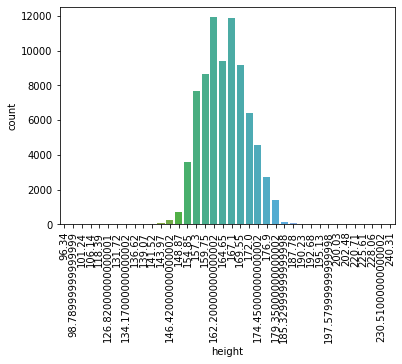

In [ ]:
sns.countplot(x='height', data=df)
plt.xticks(rotation=90)

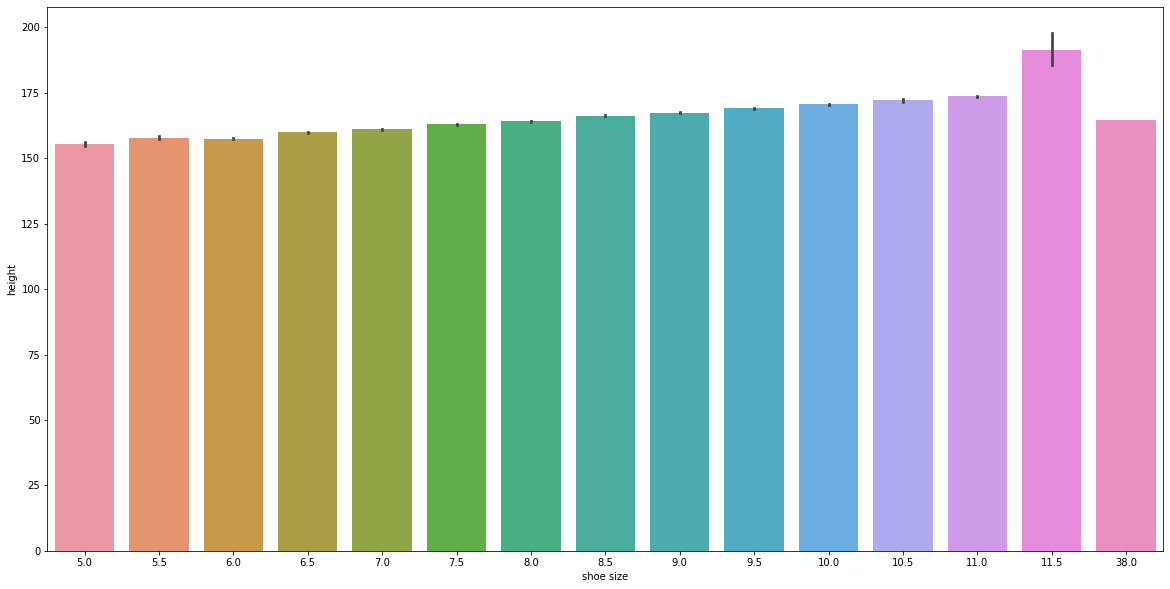

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x ='shoe size' , y = 'height')
plt.xlabel('shoe size')
plt.ylabel('height')
plt.show()

In [ ]:
df.rename(columns={'shoe size': 'shoe_size'}, inplace=True)
df.rename(columns={'shoe width': 'shoe_width'}, inplace=True)

In [ ]:
df[df['shoe_size'] ==38]

,item_id,waist,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,size
37313,416942,35.0,5.0,d,46.0,36.0,new,37-39,164.65,Catslittle,just right,fit,237498,38.0,average,12


In [ ]:
df.at[37313,'shoe_size'] = None

In [ ]:
def height_value(x):
  if x<165:
    return 5.5
  elif 165<x<185:
    return 6.5
  elif 185<x<200:
    return 7.5
  else:
    return None

In [ ]:
df.shoe_size.fillna(df['height'].apply(height_value),inplace=True)

In [ ]:
df.shoe_size.isnull().sum()

2665

In [ ]:
df.head()

,item_id,waist,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,size
0,123373,29.0,5.0,d,38.0,34.0,new,36.0,167.10,Emily,just right,small,991571,6.5,NaN,7
1,123373,31.0,3.0,b,30.0,36.0,new,NaN,157.30,sydneybraden2001,just right,small,587883,5.5,NaN,13
2,123373,30.0,2.0,b,NaN,32.0,new,NaN,169.55,Ugggh,slightly long,small,395665,9.0,NaN,7
3,123373,NaN,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,21
4,123373,NaN,5.0,b,NaN,36.0,new,NaN,157.30,dberrones1,slightly long,small,944840,5.5,NaN,18


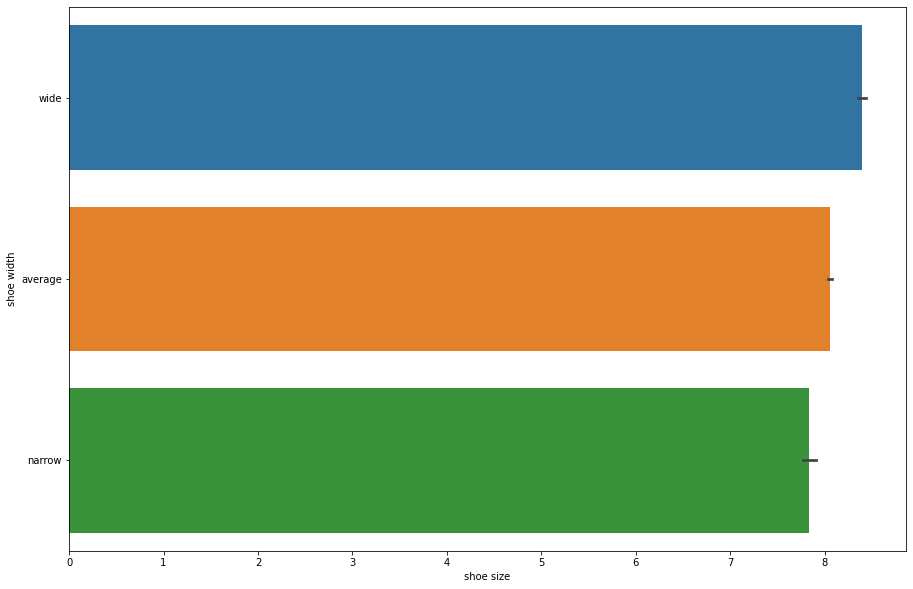

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df , x = 'shoe_size', y ='shoe_width')
plt.ylabel('shoe width')
plt.xlabel('shoe size')
plt.show()

In [ ]:
def shoe_width(x):
  if 6<x<7:
    return 'narrow'
  elif 7<x<8:
    return 'average' 
  else :
    return 'wide'

In [ ]:
df.shoe_width.fillna(df['shoe_size'].apply(shoe_width),inplace=True)

In [ ]:
df.shoe_width.isnull().sum()

0

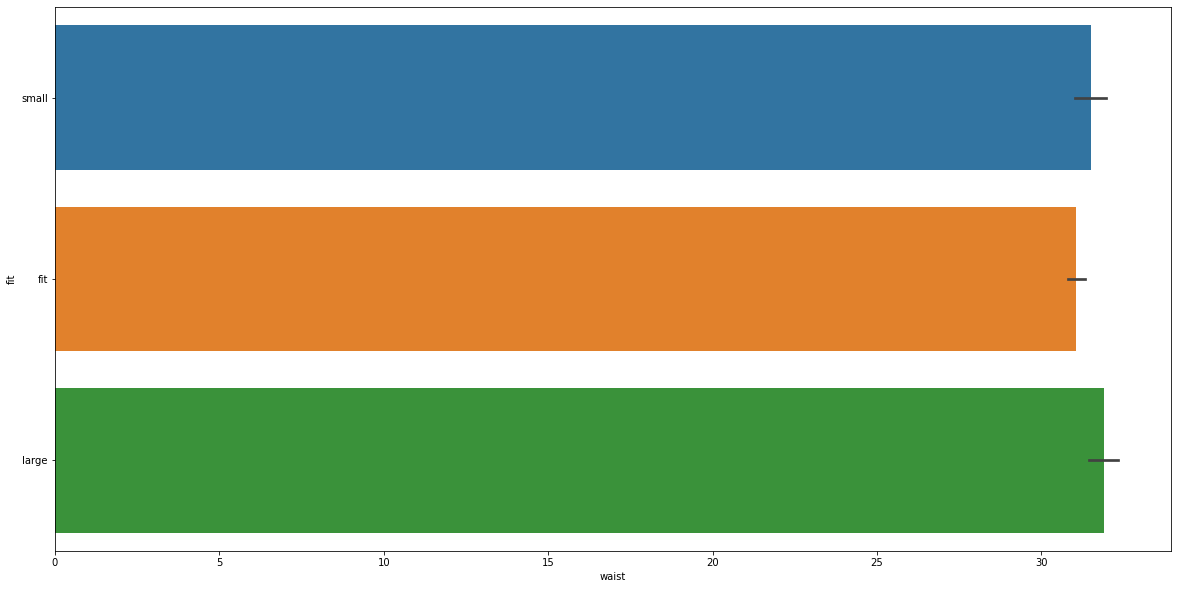

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df , y = 'fit', x ='waist')
plt.ylabel('fit')
plt.xlabel('waist')
plt.show()

In [ ]:
def fit_value(x):
  if x == 'small':
    return  random.randint(20, 35)
  else:
    return random.randint(35, 50)

In [ ]:
df.waist.fillna(df['fit'].apply(fit_value),inplace=True)

In [ ]:
df['bust'].unique()

array([36.0, nan, 39.0, 34.0, 43.0, 35.0, 38.0, 33.0, 40.0, 41.0, 44.0,
       45.0, 37.0, 30.0, 32.0, 42.0, 48.0, 46.0, 51.0, 25.0, 31.0, 26.0,
       52.0, 22.0, 50.0, 47.0, 56.0, 58.0, 49.0, 54.0, 55.0, 53.0, 27.0,
       28.0, 29.0, 20.0, 57.0, 23.0, '44', '42', '34', '36', '32', '38',
       '40', '33', '47', '35', '41', '37', '39', '46', '30', '31', '20',
       '43', '48', '45', '23', '49', '52', '26', '27', '53', '28', '56',
       '57', '37-39', '54', '50', '25', '51', '29', '58', '24', '55',
       59.0, 24.0], dtype=object)

In [ ]:
df.bust.replace("37-39",'38',inplace=True)

In [ ]:
df['bust'] = df['bust'].astype(float)

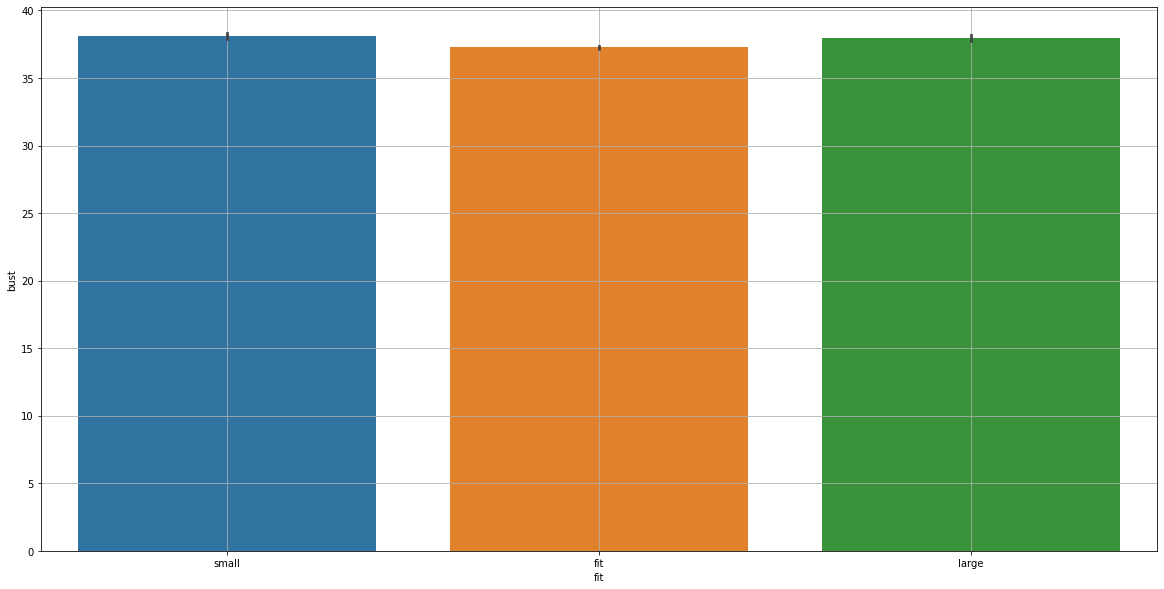

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df , x = 'fit', y ='bust')
plt.xlabel('fit')
plt.ylabel('bust')
ax.grid()
plt.show()

In [ ]:
def fit_value1(x):
  if x == 'fit':
    return 36 
  else:
    return 38.5

In [ ]:
df.bust.fillna(df['fit'].apply(fit_value1),inplace=True)

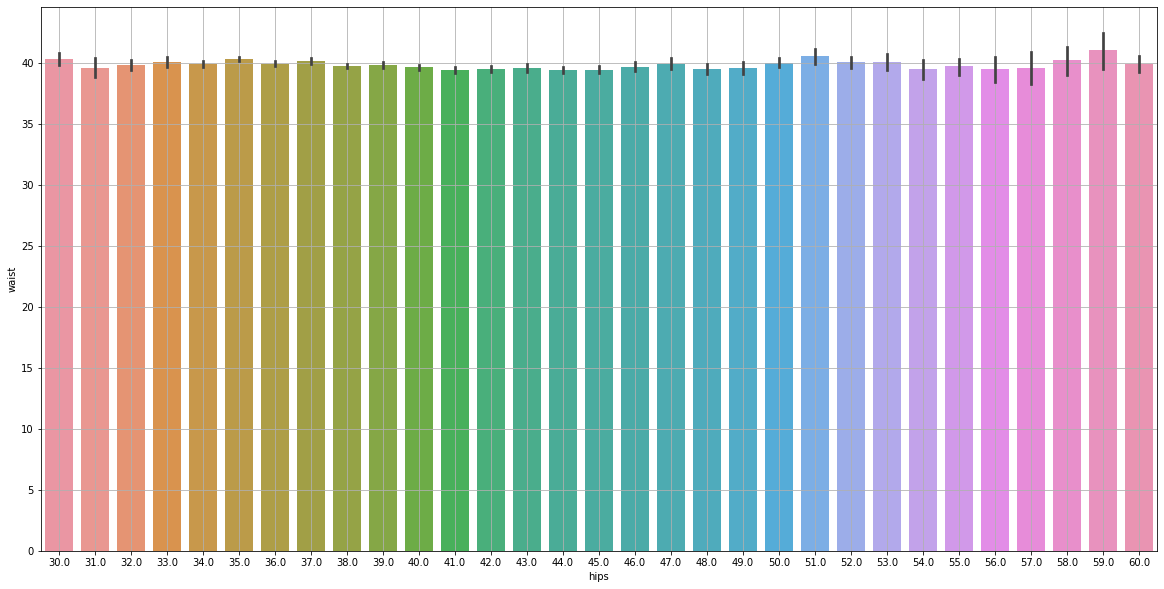

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df , x = 'hips', y ='waist')
plt.xlabel('hips')
plt.ylabel('waist')
ax.grid()
plt.show()

In [ ]:
df.hips.fillna(random.randint(38,42),inplace=True)

In [ ]:
df.isnull().sum()

item_id          0
waist            0
quality         68
cup size      6255
hips             0
bra size      6018
category         0
bust             0
height        4005
user_name        0
length          35
fit              0
user_id          0
shoe_size     2665
shoe_width       0
size             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     73007 non-null  int64  
 1   waist       73007 non-null  float64
 2   quality     73007 non-null  float64
 3   cup size    73007 non-null  object 
 4   hips        73007 non-null  float64
 5   bra size    73007 non-null  float64
 6   category    73007 non-null  object 
 7   bust        73007 non-null  float64
 8   height      73007 non-null  float64
 9   user_name   73007 non-null  object 
 10  length      73007 non-null  object 
 11  fit         73007 non-null  object 
 12  user_id     73007 non-null  int64  
 13  shoe_size   73007 non-null  float64
 14  shoe_width  73007 non-null  object 
 15  size        73007 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 9.5+ MB


In [ ]:
df.head()

,item_id,waist,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,size
0,123373,29.0,5.0,d,38.0,34.0,new,36.0,167.10,Emily,just right,small,991571,6.5,narrow,7
1,123373,31.0,3.0,b,30.0,36.0,new,38.5,157.30,sydneybraden2001,just right,small,587883,5.5,wide,13
2,123373,30.0,2.0,b,42.0,32.0,new,38.5,169.55,Ugggh,slightly long,small,395665,9.0,wide,7
4,123373,27.0,5.0,b,42.0,36.0,new,38.5,157.30,dberrones1,slightly long,small,944840,5.5,wide,18
5,123373,27.0,5.0,c,41.0,36.0,new,38.5,162.20,Doreenajane,just right,small,162012,5.5,wide,11


In [ ]:
Le = LabelEncoder()
df['cup size'] = Le.fit_transform(df['cup size'])

In [ ]:
df['category'] = Le.fit_transform(df['category'])
df['length'] = Le.fit_transform(df['length'])
df['fit'] = Le.fit_transform(df['fit'])
df['shoe_width'] = Le.fit_transform(df['shoe_width'])

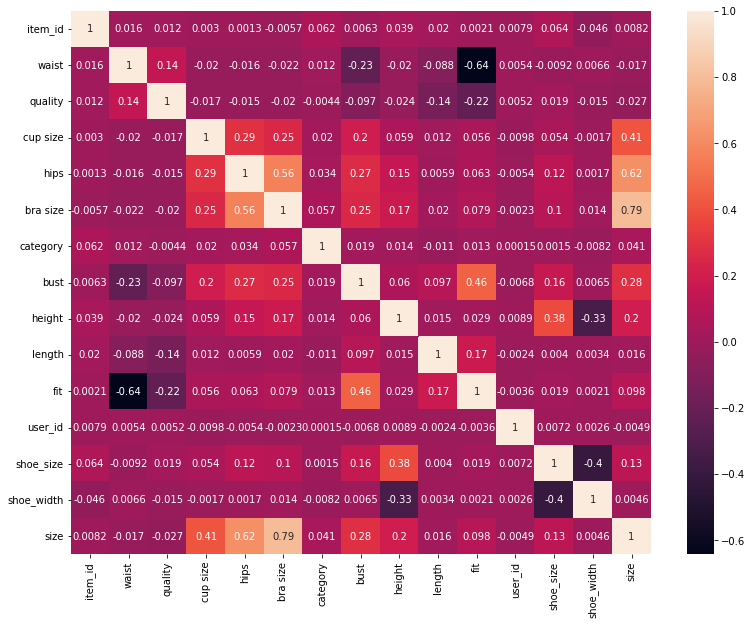

In [ ]:
corr = df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(data=corr,annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     73007 non-null  int64  
 1   waist       73007 non-null  float64
 2   quality     73007 non-null  float64
 3   cup size    73007 non-null  int64  
 4   hips        73007 non-null  float64
 5   bra size    73007 non-null  float64
 6   category    73007 non-null  int64  
 7   bust        73007 non-null  float64
 8   height      73007 non-null  float64
 9   user_name   73007 non-null  object 
 10  length      73007 non-null  int64  
 11  fit         73007 non-null  int64  
 12  user_id     73007 non-null  int64  
 13  shoe_size   73007 non-null  float64
 14  shoe_width  73007 non-null  int64  
 15  size        73007 non-null  int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 9.5+ MB


In [ ]:
del df['user_name']
del df['quality']
del df['waist']
del df['length']
del df['shoe_width']
del df['user_id']

In [ ]:
def for_size(x):
  if 0<=x<=9:
    return "xs"
  elif 9<x<=15:
    return "s"
  elif 15<x<=20:
    return 'm'
  elif 20<x<=25:
    return 'l'
  elif 25<x<=30:
    return 'xl'
  elif x>30:
    return 'xxl'

In [ ]:
df.size = df['size'].apply(for_size)

In [ ]:
df['size'].unique()

array(['xs', 's', 'm', 'xl', 'l', 'xxl'], dtype=object)

In [ ]:
df[df['size'] == None]

,item_id,cup size,hips,bra size,category,bust,height,fit,shoe_size,size


In [ ]:
a = df['size'].unique()
a.sort()
a

array(['l', 'm', 's', 'xl', 'xs', 'xxl'], dtype=object)

In [ ]:
df['size'] = Le.fit_transform(df['size'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    73007 non-null  int64  
 1   cup size   73007 non-null  int64  
 2   hips       73007 non-null  float64
 3   bra size   73007 non-null  float64
 4   category   73007 non-null  int64  
 5   bust       73007 non-null  float64
 6   height     73007 non-null  float64
 7   fit        73007 non-null  int64  
 8   shoe_size  73007 non-null  float64
 9   size       73007 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 6.1 MB


In [ ]:
x = df.values[:,0:9]
y = df.values[:,9]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((54755, 9), (18252, 9), (54755,), (18252,))

In [ ]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predictions = LR.predict(x_test)
print("Accuracy:")
print("Testing accuracy : ",accuracy_score(y_test, predictions)*100)
print("Training accuracy : ",accuracy_score(y_train,LR.predict(x_train))*100)

Accuracy:
Testing accuracy :  44.45540214770984
Training accuracy :  44.43247192037257


In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
print("Accuracy:")
print("Training accuracy : ",accuracy_score(y_train,KNN.predict(x_train))*100)
print("Testing accuracy : ",accuracy_score(y_test, predictions)*100)

Accuracy:
Training accuracy :  72.89745228746233
Testing accuracy :  61.41792680254219


In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
print("Accuracy:")
print("Training accuracy : ",accuracy_score(y_train,DT.predict(x_train))*100)
print("Testing accuracy : ",accuracy_score(y_test, predictions)*100)

Accuracy:
Training accuracy :  98.88777280613643
Testing accuracy :  61.664475126013585


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)
print("Training accuracy : ",accuracy_score(y_train,rf_train_pred)*100)
print("Testing accuracy : ",accuracy_score(y_test, rf_test_pred)*100)

Training accuracy :  98.88594648890512
Testing accuracy :  68.71027832566294


In [ ]:
df.head()

,item_id,cup size,hips,bra size,category,bust,height,fit,shoe_size,size
0,123373,4,38.0,34.0,2,36.0,167.10,2,6.5,4
1,123373,2,30.0,36.0,2,38.5,157.30,2,5.5,2
2,123373,2,42.0,32.0,2,38.5,169.55,2,9.0,4
4,123373,2,42.0,36.0,2,38.5,157.30,2,5.5,1
5,123373,3,41.0,36.0,2,38.5,162.20,2,5.5,2


In [ ]:
print(rf.predict([[123373, 4, 39.0, 35,	2,	36.0,	167.64,	2,	8.5]]))

[4.]


In [ ]:
def decode_size(x):
  if x==0:
    return 'L'
  elif x==1:
    return 'M'
  elif x==2:
    return 'S'
  elif x==3:
    return 'XL'
  elif x==4:
    return 'XS'
  elif x==5:
    return 'XXL'

In [ ]:
def prediction(id,cup_size,hips,bra,category,bust,height,fit,shoe_size):
  print("      Details")
  print()
  print("Item id   : ",id)
  print("Cup size  : ",cup_size)
  print("Hips      : ",hips)
  print("Bra size  : ",bra)
  print("Category  : ",category)
  print("Bust      : ",bust)
  print("Height    : ",height)
  print("Fit       : ",fit)
  print("Shoe size : ",shoe_size)

  size = rf.predict([[id,cup_size,hips,bra,category,bust,height,fit,shoe_size]])
  decode_size(size)
  print()
  print("Size      : ",decode_size(size))

In [ ]:
prediction(123373, 4, 39.0, 35,	2,	36.0,	167.64,	2,	8.5)

      Details

Item id   :  123373
Cup size  :  4
Hips      :  39.0
Bra size  :  35
Category  :  2
Bust      :  36.0
Height    :  167.64
Fit       :  2
Shoe size :  8.5

Size      :  XS
